# Lab 5 code

General notes: 

*Don't worry about missing letters -- I removed some minor stuff

*Follow along with the lab instructions document provided on canvas. They will tell you when to run what. You'll just be running each cell in a row as you get to it in the instructions.

*I don't need you to submit this jupyter notebook since I'm giving you the code. I also do not want you to submit the instructions with your answers embedded (it's a lot of scrolling for me). Please submit a document with just your the numbered questions (i.e. Q1) and your answers.

In [1]:
#prerequisites

#install and load "devtools" in order to use function install_version()
install.packages("devtools")
library(devtools)

#install and load an old version of "loa" package that still has the function quickMap()
install_version("loa", version = "0.2.44.2", repos = "http://cran.us.r-project.org")
library(loa)

#load tidyverse
library(tidyverse)

#install and load "gridExtra" to combine plots using the function grid.arrange()
install.packages("gridExtra")
library(gridExtra)

also installing the dependencies ‘processx’, ‘callr’, ‘cli’, ‘desc’, ‘pkgload’, ‘remotes’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: usethis




sp          (NA -> 1.4-5  ) [CRAN]
png         (NA -> 0.1-7  ) [CRAN]
RgoogleMaps (NA -> 1.4.5.3) [CRAN]


Installing 3 packages: sp, png, RgoogleMaps

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: lattice

Warning message:
“package ‘lattice’ was built under R version 4.0.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.3”
Warning message:
“package ‘tibble’ was built under R version 4.0.3”
Warning message:
“package ‘tidyr’ was built under R version 4.0.3”
Warning message:
“package ‘readr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.3”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag() 

## Part I
### Distribution

In [15]:
#B 
#Uses the "read.csv()" function to read in our datasets to R and uses "<-" to assign each of them a name.  Don't worry about the "na.omit" line for now.
alpinus <-read.csv("data/alpinusYNP.csv")
senex <- na.omit(read.csv("data/senexYNP.csv"))
speciosus <-read.csv("data/speciosusYNP.csv")

#C 
#Makes a combined dataset with all species by using the "rbind()" function to combine all of the rows from the previous three datasates.  Uses "<-" to name this dataset "all"
all <- rbind(alpinus, senex, speciosus)

#D 
#Makes a list of colors that we'll later use to color the points we're about to plot on a map; red will be historic, blue modern.
colorlist <- c("red","blue")

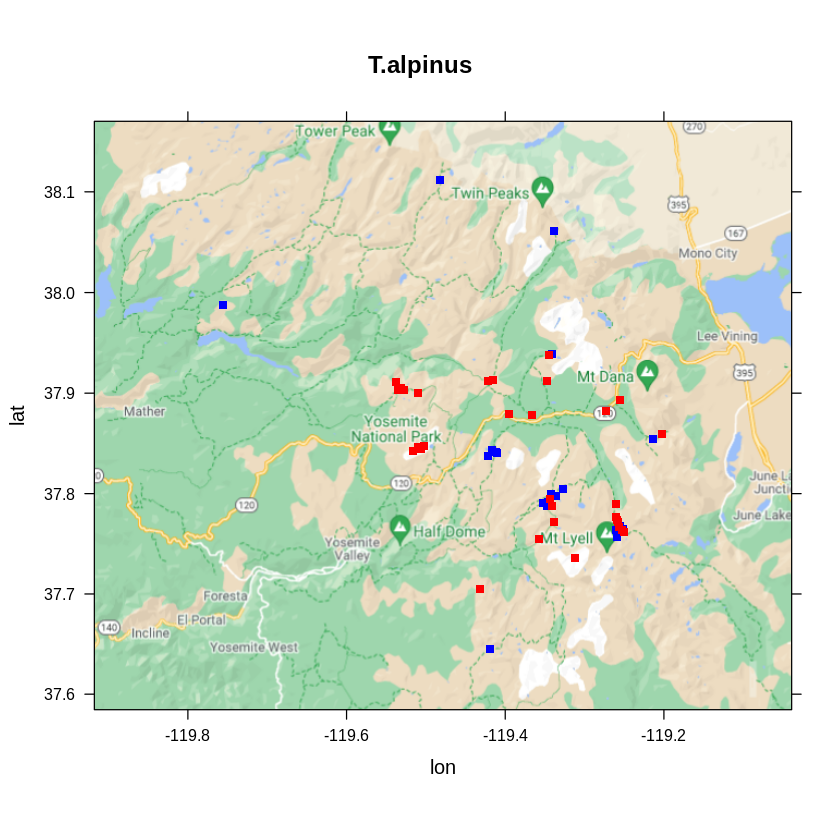

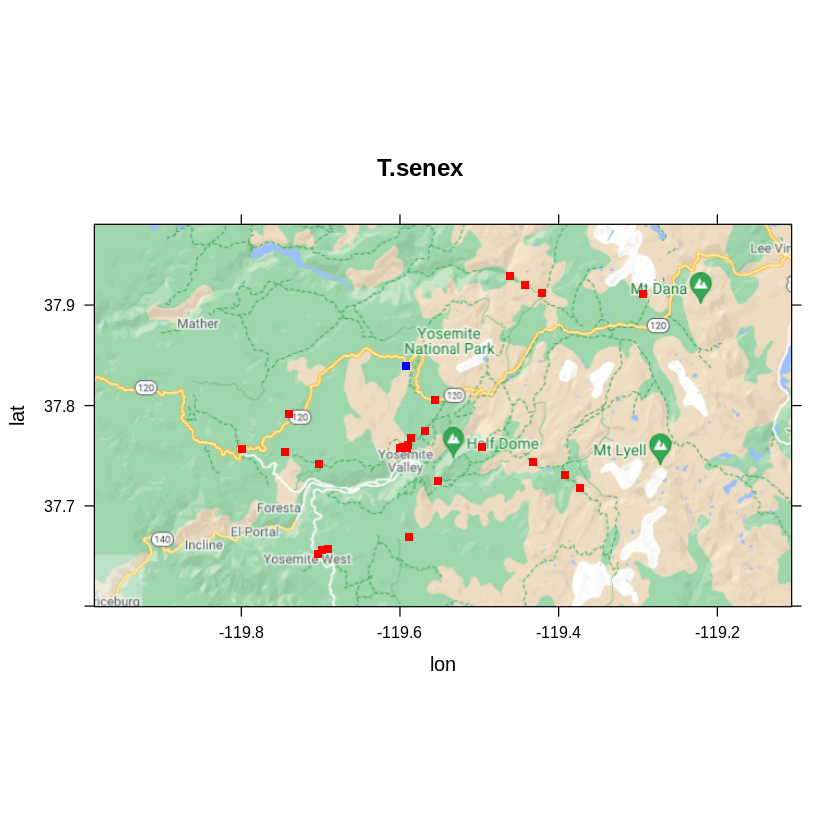

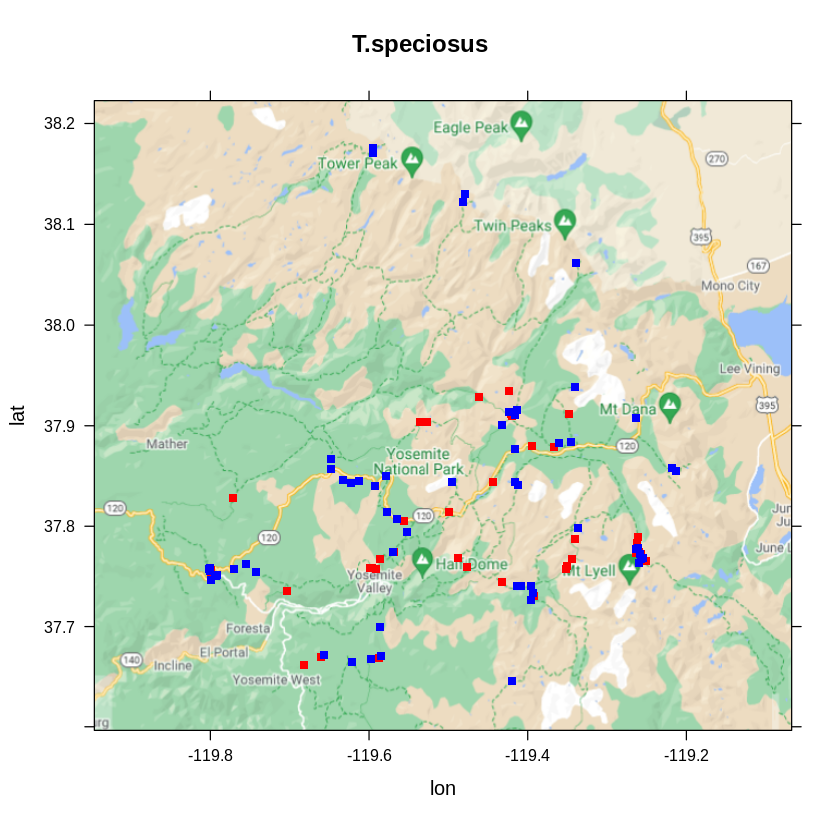

In [16]:
#E
#Plots our points, based on the GPS data, for each species independently: 

#Using the "quickMap()" function and telling it to use the values from the latitude and longitude columns of each of the species-specific
#dataframes to plot points on a map, and to color the points by which era they are from.  "show.data" makes the points appear on the map.  "main" gives the map a title.  "pch" sets the shape of the points (circle, star, triangle, etc.).
quickMap(alpinus$DEC_LAT, alpinus$DEC_LONG,show.data=T, col=colorlist[as.numeric(alpinus$ERA=="M")+1], main = "T.alpinus", pch=15)
quickMap(senex$DEC_LAT, senex$DEC_LONG,show.data=T, col=colorlist[as.numeric(senex$ERA=="M")+1], main = "T.senex", pch=15)
quickMap(speciosus$DEC_LAT, speciosus$DEC_LONG,show.data=T, col=colorlist[as.numeric(speciosus$ERA=="M")+1], main = "T.speciosus", pch=15)

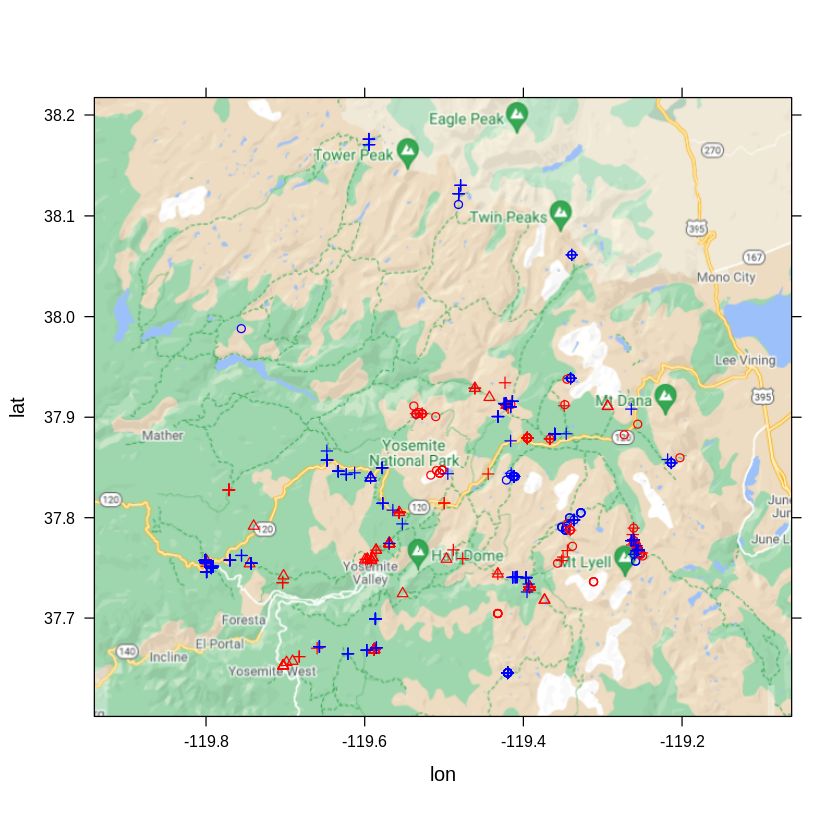

In [17]:
#F
#Then plots the data for all species together, where the shape of the point indicates which species it is 
#this does the same thing, except for the combined dataset, and it sets the shape of the point depending on
#which species it is instead of using the same shape for all points.
quickMap(all$DEC_LAT, all$DEC_LONG,show.data=T, col=colorlist[as.numeric(all$ERA=="M")+1], pch=factor(all$SCIENTIFIC_NAME))


Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”


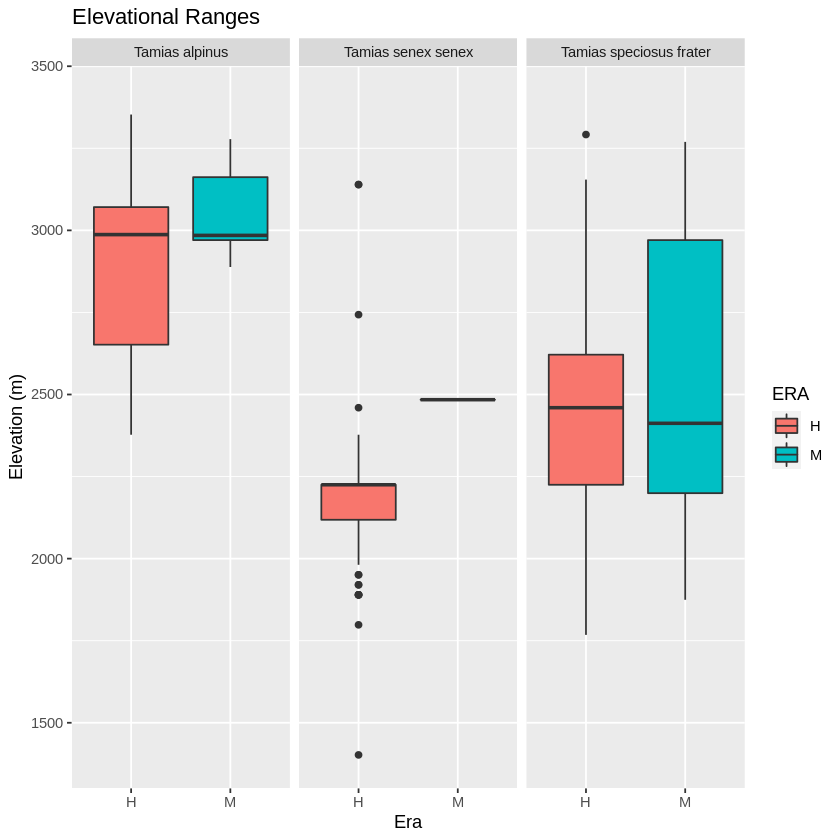

In [18]:
#G: 
#Makes plots of elevational ranges for each species

#Each of these rows uses the geom_boxplot argument for the ggplot function to plot the elevational range of each species. 
#Inside the "ggplot()" function, the "all" argument says that we're using the data set with all three species, and the "aes()" 
#argument specifies which variables we want to put on the axes and use to color code each boxplot.  "geom_boxplot" says that 
#we want to make a boxplot.  "ylim" sets the range of the y-axis, "xlab" and "ylab" give the text for the labels on the axes, 
#and "ggtitle()" creates a title for the plot.  Finally, "facet_wrap" tells R that we want to make a set of elevation boxplots 
#for each species in the all data set.
elev.ranges <- ggplot(all) + aes(x = ERA, y = ELEVATION, fill = ERA) + geom_boxplot() + ylim(c(1400, 3400)) + xlab('Era') + ylab('Elevation (m)') + ggtitle('Elevational Ranges') + facet_wrap(~SCIENTIFIC_NAME)
elev.ranges
# You will likely get this error message when you run the line above: 
#"Warning message: Removed 10 rows containing non-finite values (stat_boxplot)."  
#It's fine to ignore this-- it just means that R removed 10 cases in which there was no elevation recorded for a specimen.


In [21]:
#I
all_elev <- all %>% filter(!is.na(ELEVATION))

all_elev %>% group_by(SCIENTIFIC_NAME, ERA) %>% summarize(avg_elev=round(mean(ELEVATION)), min_elev=round(min(ELEVATION)), max_elev=round(max(ELEVATION)))

`summarise()` has grouped output by 'SCIENTIFIC_NAME'. You can override using the `.groups` argument.



SCIENTIFIC_NAME,ERA,avg_elev,min_elev,max_elev
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Tamias alpinus,H,2931,2377,3353
Tamias alpinus,M,3058,2888,3278
Tamias senex senex,H,2186,1402,3139
Tamias senex senex,M,2484,2484,2484
Tamias speciosus frater,H,2451,1768,3292
Tamias speciosus frater,M,2506,1875,3270


In [22]:
#J
print("ALPINUS:")
t.test(ELEVATION ~ ERA, data = alpinus, alternative = 'two.sided', var.equal = FALSE)
print("SENEX:")
t.test(ELEVATION ~ ERA, data = senex, alternative = 'two.sided', var.equal = FALSE)
print("SPECIOSUS:")
t.test(ELEVATION ~ ERA, data = speciosus, alternative = 'two.sided', var.equal = FALSE)

[1] "ALPINUS:"



	Welch Two Sample t-test

data:  ELEVATION by ERA
t = -4.3291, df = 101.07, p-value = 3.53e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -185.04120  -68.74778
sample estimates:
mean in group H mean in group M 
       2931.023        3057.917 


[1] "SENEX:"



	Welch Two Sample t-test

data:  ELEVATION by ERA
t = -9.5683, df = 63, p-value = 6.81e-14
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -360.0752 -235.6564
sample estimates:
mean in group H mean in group M 
       2186.254        2484.120 


[1] "SPECIOSUS:"



	Welch Two Sample t-test

data:  ELEVATION by ERA
t = -1.4248, df = 263.65, p-value = 0.1554
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -131.37983   21.06816
sample estimates:
mean in group H mean in group M 
       2450.879        2506.035 


### Climate data

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



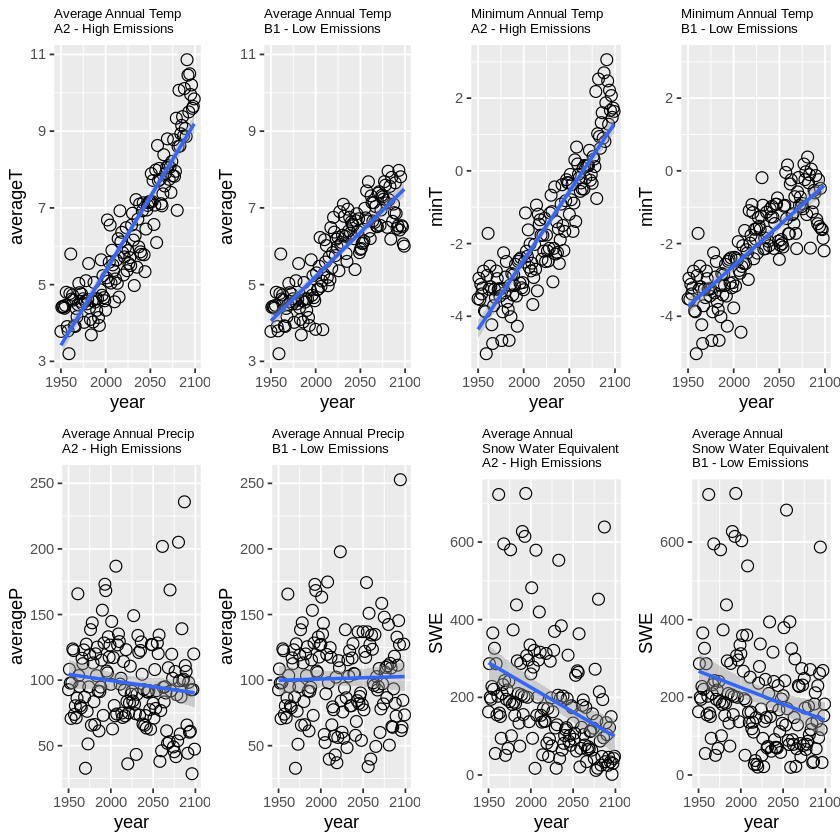

In [45]:
#Reading in data and establishing high (a2) and low (b1) emissions dataframes
c <- read.csv("data/climateDataYNP.csv")
a2 <- c %>% filter(scenario_id=="a2")
b1 <- c %>% filter(scenario_id=="b1")

# Writing code for each plot
a2.avgT.plot <- ggplot(a2) + aes(x = year, y = averageT) + ylim(range(c$averageT)) + geom_point(pch = 21, colour = 'black', size = 3) + stat_smooth(method = lm) + ggtitle('Average Annual Temp\nA2 - High Emissions') + theme(plot.title = element_text(size = 8))

b1.avgT.plot <- ggplot(b1) + aes(x = year, y = averageT) + ylim(range(c$averageT)) + geom_point(pch = 21, colour = 'black', size = 3) + stat_smooth(method = lm) + ggtitle('Average Annual Temp\nB1 - Low Emissions') + theme(plot.title = element_text(size = 8))

a2.minT.plot <- ggplot(a2) + aes(x = year, y = minT) + ylim(range(c$minT)) + geom_point(pch = 21, colour = 'black', size = 3) + stat_smooth(method = lm) + ggtitle('Minimum Annual Temp\nA2 - High Emissions') + theme(plot.title = element_text(size = 8))

b1.minT.plot <- ggplot(b1) + aes(x = year, y = minT) + ylim(range(c$minT)) + geom_point(pch = 21, colour = 'black', size = 3) + stat_smooth(method = lm) + ggtitle('Minimum Annual Temp\nB1 - Low Emissions') + theme(plot.title = element_text(size = 8))

a2.averageP.plot <- ggplot(a2) + aes(x = year, y = averageP) + ylim(range(c$averageP)) + geom_point(pch = 21, colour = 'black', size = 3) + stat_smooth(method = lm) + ggtitle('Average Annual Precip\nA2 - High Emissions') + theme(plot.title = element_text(size = 8))

b1.averageP.plot <- ggplot(b1) + aes(x = year, y = averageP) + ylim(range(c$averageP)) + geom_point(pch = 21, colour = 'black', size = 3) + stat_smooth(method = lm) + ggtitle('Average Annual Precip\nB1 - Low Emissions') + theme(plot.title = element_text(size = 8))

a2.SWE.plot <- ggplot(a2) + aes(x = year, y = SWE) + ylim(range(c$SWE)) + geom_point(pch = 21, colour = 'black', size = 3) + stat_smooth(method = lm) + ggtitle('Average Annual\nSnow Water Equivalent\nA2 - High Emissions') + theme(plot.title = element_text(size = 8))

b1.SWE.plot <- ggplot(b1) + aes(x = year, y = SWE) + ylim(range(c$SWE)) + geom_point(pch = 21, colour = 'black', size = 3) + stat_smooth(method = lm) + ggtitle('Average Annual\nSnow Water Equivalent\nB1 - Low Emissions') + theme(plot.title = element_text(size = 8))

# Making all plots at once
grid.arrange(a2.avgT.plot, b1.avgT.plot,a2.minT.plot, b1.minT.plot,a2.averageP.plot, b1.averageP.plot,a2.SWE.plot,b1.SWE.plot, nrow=2)





## Part II.A
### Morphology

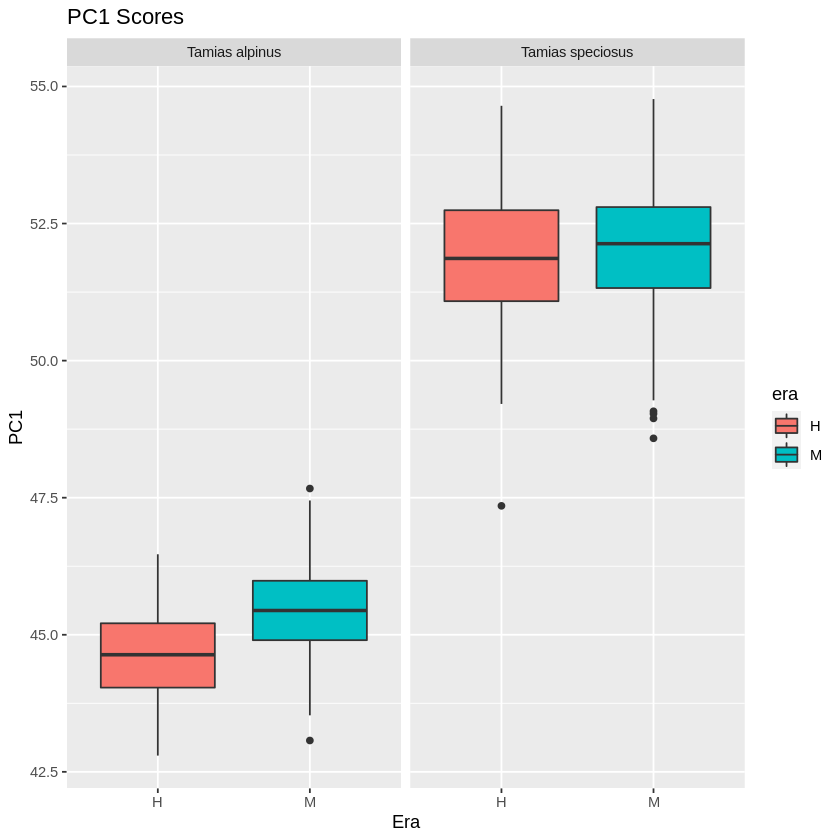

In [25]:

#B
# Uses the 'read.csv()' function to read in the morphology dataset to R, used the '<-' to assign a name to this data set.
chip.morph <- read.csv(file = 'data/chipmunks.morph.csv')
# The 'names()' function shows the column names of chip.morph
#names(chip.morph)

#C
# Sets up the data to plot PC1 scores across eras for each species

# Use ggplot again (see section #G of the Rchipmunks file for info about the ggplot function)
pc1.plots <- ggplot(chip.morph) + aes(x = era, y = pc1, fill = era) + geom_boxplot() + ylim(range(chip.morph$pc1)) + xlab('Era') + ylab('PC1') + ggtitle('PC1 Scores') + facet_wrap(~species)
pc1.plots


In [33]:
#D

print("ALPINUS:")

#Makes a dataset that consists of all T. alpinus observations
alp.morph <- chip.morph %>% filter(species == 'Tamias alpinus')

#Conducts t-tests to compare PC1 scores between eras for T. alpinus
#The 'alternative = 'two.sided'' argument means that we're conducting a two-tailed t-test, 
#and the 'var.equal = FALSE' specifies that the two groups we are comparing have unequal variances.
t.test(pc1 ~ era, data = alp.morph, alternative = 'two.sided', var.equal = FALSE)

#same as above but for speciosus
print("SPECIOSUS:")
spec.morph <- chip.morph %>% filter(species == 'Tamias speciosus')
t.test(pc1 ~ era, data = spec.morph, alternative = 'two.sided', var.equal = FALSE)


[1] "ALPINUS:"



	Welch Two Sample t-test

data:  pc1 by era
t = -4.0388, df = 63.391, p-value = 0.0001475
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.2364741 -0.4179816
sample estimates:
mean in group H mean in group M 
       44.57965        45.40688 


[1] "SPECIOSUS:"



	Welch Two Sample t-test

data:  pc1 by era
t = -1.7085, df = 120.75, p-value = 0.09011
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5995187  0.0441007
sample estimates:
mean in group H mean in group M 
       51.77488        52.05259 


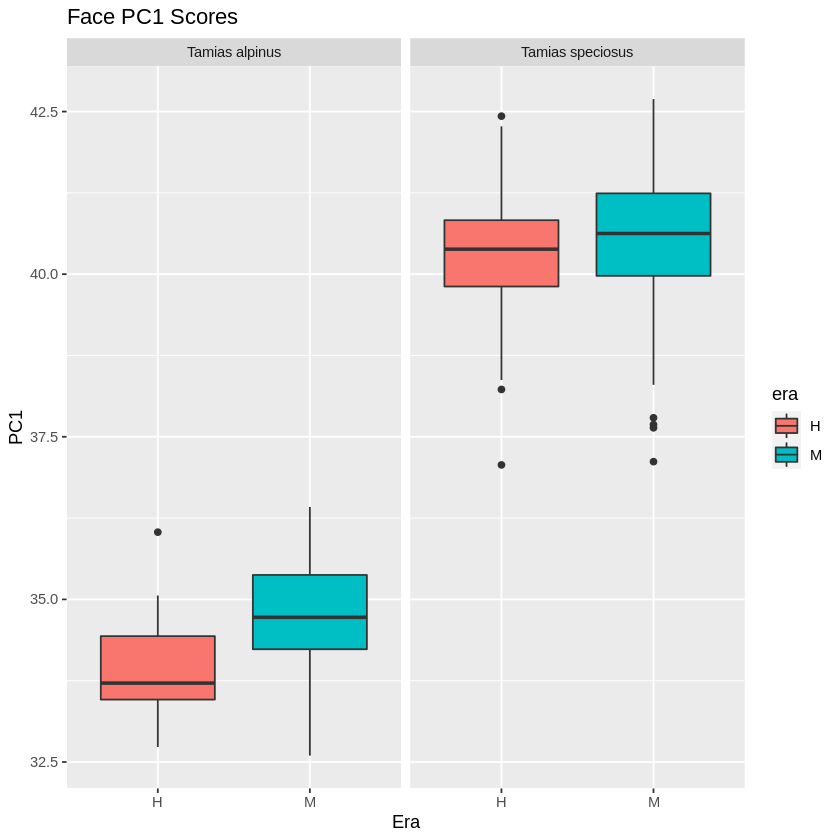

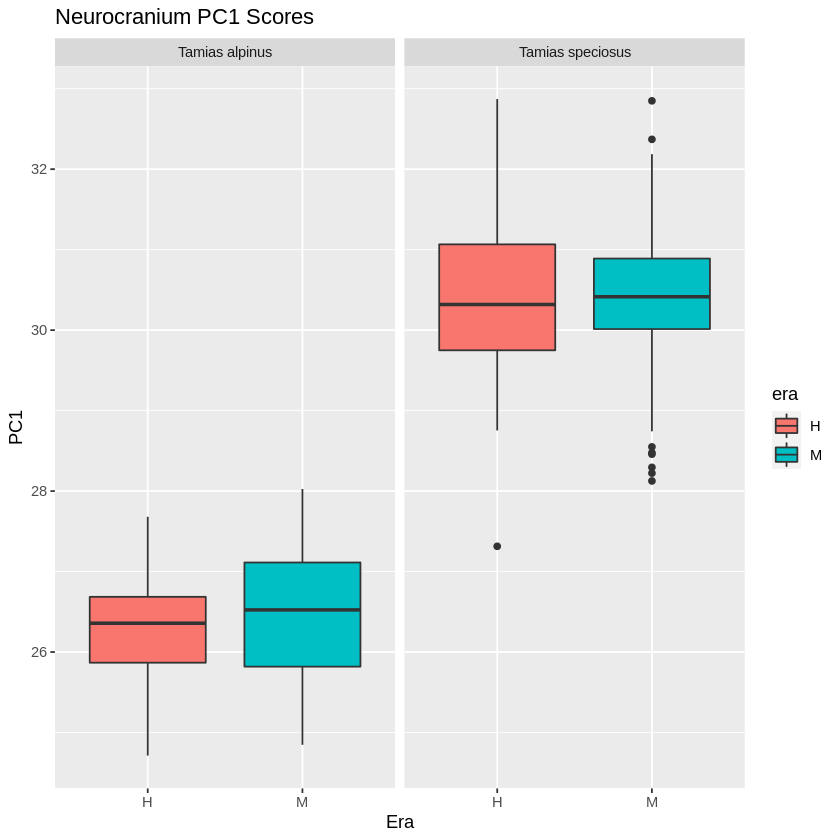

In [44]:
#E
# Now plot facial and neurocranium regions separately
# Face
face.plots <- ggplot(chip.morph) + aes(x = era, y = face.proj, fill = era) + geom_boxplot() + ylim(range(chip.morph$face.proj)) + xlab('Era') + ylab('PC1') + ggtitle('Face PC1 Scores') + facet_wrap(~species)
face.plots
# Neurocranium
neuro.plots <- ggplot(chip.morph) + aes(x = era, y = neuro.proj, fill = era) + geom_boxplot() + ylim(range(chip.morph$neuro.proj)) + xlab('Era') + ylab('PC1') + ggtitle('Neurocranium PC1 Scores') + facet_wrap(~species)
neuro.plots




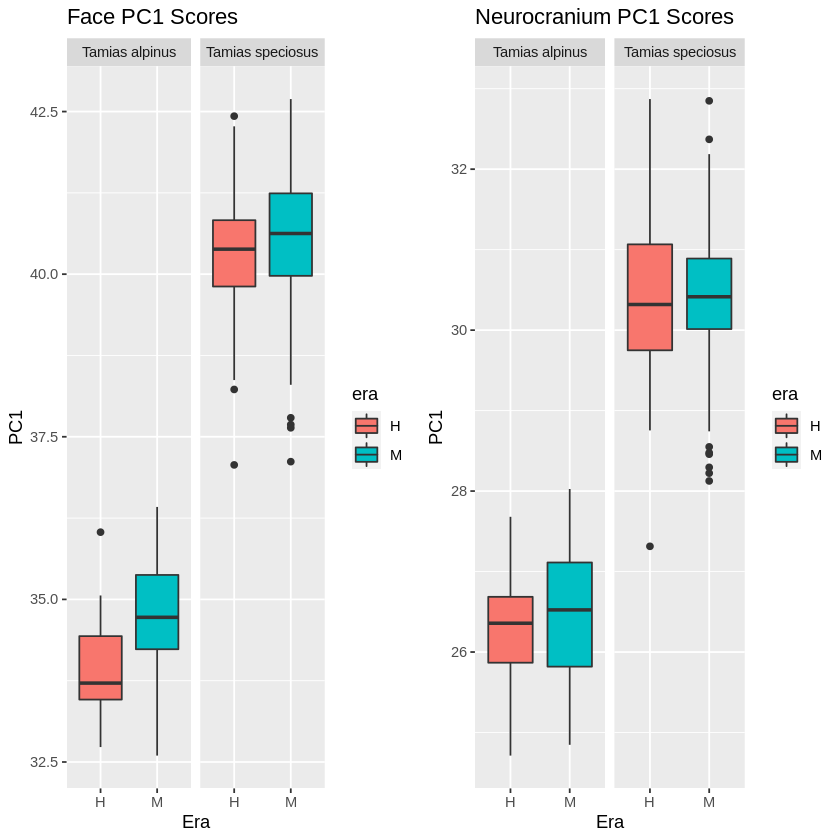

In [31]:
#E continued (looking at the two side-by-side)
# If you want to see both plots at once:
grid.arrange(face.plots, neuro.plots, nrow=1)

In [35]:
#F
# Conducts t-tests to compare face and neurocranium PC scores between eras
print("face, alpinus:")
t.test(face.proj ~ era, data = alp.morph, alternative = 'two.sided', var.equal = FALSE)
print("face, speciosus:")
t.test(face.proj ~ era, data = spec.morph, alternative = 'two.sided', var.equal = FALSE)
print("neurocranium, alpinus:")
t.test(neuro.proj ~ era, data = alp.morph, alternative = 'two.sided', var.equal = FALSE)
print("neurocranium, speciosus:")
t.test(neuro.proj ~ era, data = spec.morph, alternative = 'two.sided', var.equal = FALSE)


[1] "face, alpinus:"



	Welch Two Sample t-test

data:  face.proj by era
t = -4.6345, df = 68.299, p-value = 1.661e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1884922 -0.4731146
sample estimates:
mean in group H mean in group M 
       33.87577        34.70657 


[1] "face, speciosus:"



	Welch Two Sample t-test

data:  face.proj by era
t = -2.3053, df = 132.47, p-value = 0.02271
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5605915 -0.0428257
sample estimates:
mean in group H mean in group M 
       40.26429        40.56599 


[1] "neurocranium, alpinus:"



	Welch Two Sample t-test

data:  neuro.proj by era
t = -1.4707, df = 64.365, p-value = 0.1462
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.54527293  0.08282268
sample estimates:
mean in group H mean in group M 
       26.27310        26.50433 


[1] "neurocranium, speciosus:"



	Welch Two Sample t-test

data:  neuro.proj by era
t = -0.63283, df = 113.94, p-value = 0.5281
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3148743  0.1624079
sample estimates:
mean in group H mean in group M 
       30.34720        30.42343 


## Part II.B
### Genetics

In [37]:
#B
# Uses the 'read.csv()' function to read in the allelic diversity dataset to R, used the '<-' to assign a name to this data set.
chip.allele <- read.csv('data/chipmunks.alleles.csv')
# The 'names()' function shows the column names of chip.morph (viewable in R console)
#names(chip.allele)
chip.allele

Locus,Species,Richness,Era
<chr>,<chr>,<dbl>,<chr>
eu26,T. alpinus,11.3903,H
eu41,T. alpinus,9.6571,H
eu86,T. alpinus,12.4786,H
eu94,T. alpinus,7.9682,H
eu37,T. alpinus,7.1253,H
a101,T. alpinus,9.0000,H
d115,T. alpinus,7.0000,H
eu26,T. alpinus,7.9630,M
eu41,T. alpinus,6.6849,M


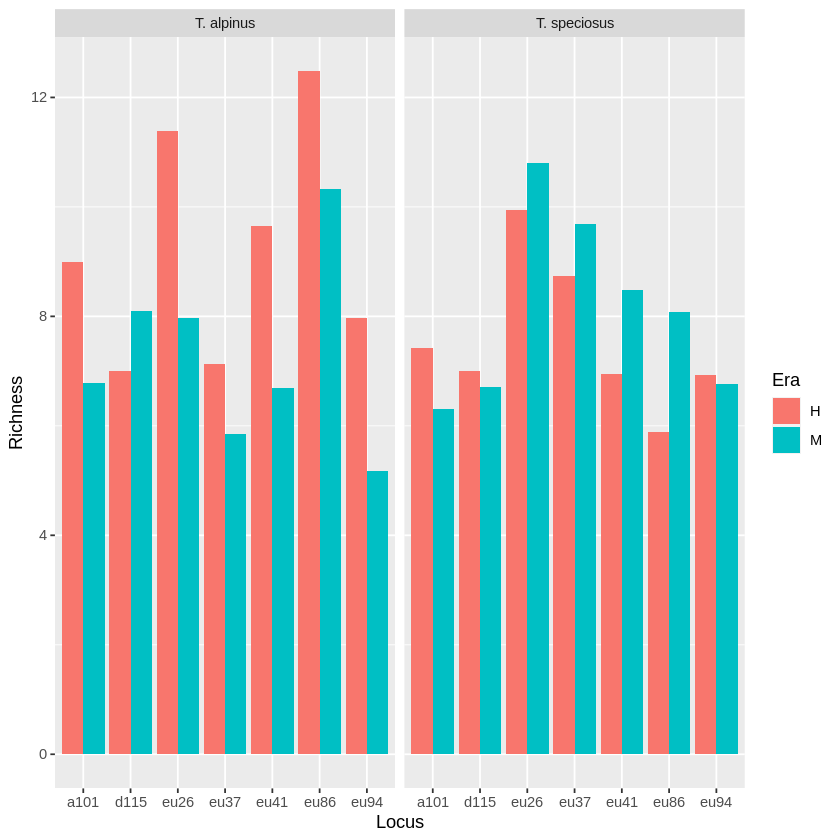

In [38]:
#C
# Makes one barplot for each species, showing average allelic diversity at each locus in the H and M eras.
rich.plot <- ggplot(chip.allele) + aes(x = Locus, y = Richness, fill = Era) + geom_bar(position = 'dodge', stat = 'identity') + facet_wrap(~Species)
rich.plot


In [39]:
#D
# Compare allelic richness between historical and modern sampling periods
# Makes 2 new data sets: one that consists of all rows with species = T. alpinus, another that consists of all rows with species = T. speciosus
alp.allele <- chip.allele %>% filter(Species == 'T. alpinus')
spec.allele <- chip.allele %>% filter (Species == 'T. speciosus')

# Compare richness for T. alpinus
print("alpinus:")
t.test(Richness ~ Era, data = alp.allele, alternative = 'two.sided', var.equal = FALSE, paired = TRUE)

# Compare richness for T. speciosus
print("speciosus:")
t.test(Richness ~ Era, data = spec.allele, alternative = 'two.sided', var.equal = FALSE, paired = TRUE)


[1] "alpinus:"



	Paired t-test

data:  Richness by Era
t = 3.4316, df = 6, p-value = 0.01394
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.563291 3.362709
sample estimates:
mean of the differences 
                  1.963 


[1] "speciosus:"



	Paired t-test

data:  Richness by Era
t = -1.2996, df = 6, p-value = 0.2414
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.6310588  0.4994874
sample estimates:
mean of the differences 
             -0.5657857 


In [40]:
#E
# Uses the 'read.csv()' function to read in the Fst dataset to R, used the '<-' to assign a name to this data set.
chip.fst <- read.csv("data/chipmunks.fst.csv")
# The 'names()' function shows the column names of chip.morph
#names(chip.fst)
chip.fst

Locus,Species,Fst,Era
<int>,<chr>,<dbl>,<chr>
1,T. alpinus,0.018473,H
2,T. alpinus,-0.000976,H
3,T. alpinus,0.031530,H
4,T. alpinus,0.080439,H
5,T. alpinus,-0.008167,H
6,T. alpinus,0.006491,H
7,T. alpinus,0.053131,H
1,T. speciosus,0.095638,H
2,T. speciosus,-0.004300,H


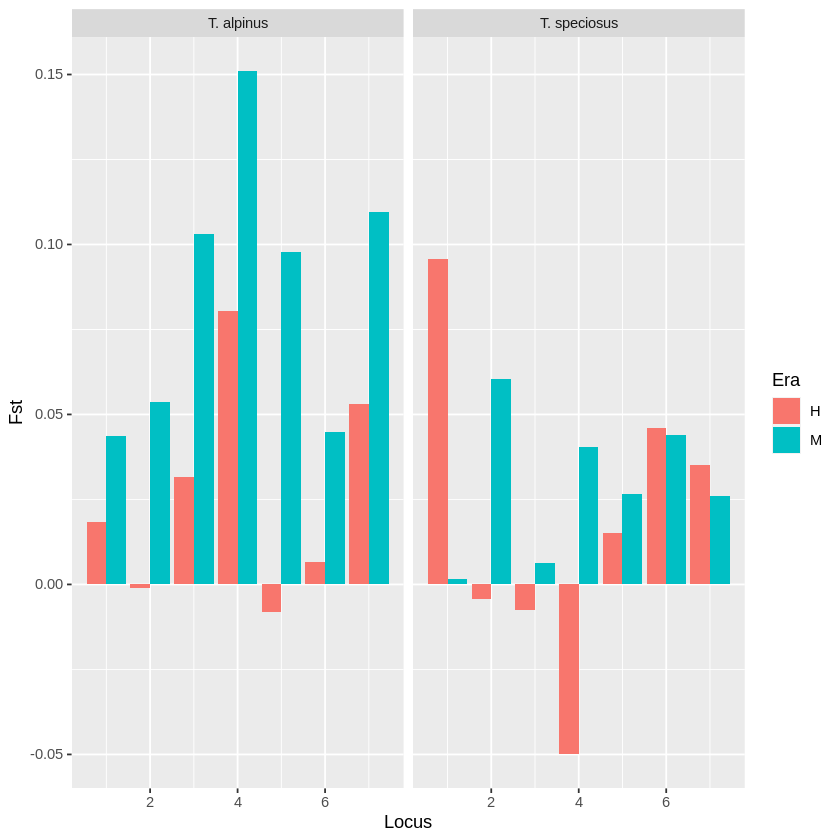

In [43]:
#F
# Makes one barplot for each species, showing average allelic diversity at each locus in the H and M eras.
fst.plot <- ggplot(chip.fst) + aes(x = Locus, y = Fst, fill = Era) + geom_bar(position = 'dodge', stat = 'identity') + facet_wrap(~Species)
fst.plot

In [42]:
#G
# Compare Fst between historical and modern sampling periods
# Makes 2 new data sets: one that consists of all rows with species = T. alpinus, another that consists of all rows with species = T. speciosus
alp.fst <- chip.fst %>% filter(Species == 'T. alpinus')
spec.fst <- chip.fst %>% filter(Species == 'T. speciosus')

# Compare Fst for T. alpinus
print("alpinus:")
t.test(Fst ~ Era, data = alp.fst, alternative = 'two.sided', var.equal = FALSE, paired = TRUE)

# Compare Fst for T. speciosus
print("speciosus:")
t.test(Fst ~ Era, data = spec.fst, alternative = 'two.sided', var.equal = FALSE, paired = TRUE)


[1] "alpinus:"



	Paired t-test

data:  Fst by Era
t = -6.1362, df = 6, p-value = 0.0008571
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.08448033 -0.03631253
sample estimates:
mean of the differences 
            -0.06039643 


[1] "speciosus:"



	Paired t-test

data:  Fst by Era
t = -0.48647, df = 6, p-value = 0.6439
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06529341  0.04363683
sample estimates:
mean of the differences 
            -0.01082829 
